## New Density Sagital File

In [1]:
# import library
import pandas as pd
import numpy as np

# to order a dictionary 
from collections import OrderedDict

# for heat map
import seaborn as sns

# for scikic learn metrices
from sklearn import metrics

# for normalization
from sklearn.preprocessing import StandardScaler

# for PCA two different packages
from sklearn.decomposition import PCA
#from pca import pca


# for plotting
import matplotlib.pyplot as plt

In [2]:
# load the file
denSag = pd.read_csv("../NewDenS.csv")

#### We see 21553 Genes for this data

In [3]:
# print the head of file
denSag.head()

,Unnamed: 0,voxRowNum,Structure-ID,X,Y,Z,Nvl-6,Gtf3c2-8,Ndufv3-13,1810074P20Rik-15,...,Cnfn-100146167,Akap7-100147502,Acin1-100147503,1810074P20Rik-100147504,9930038K12Rik-100147505,4930412L05Rik-100147506,Chrna10-100147507,Nkx2-5-100147508,4933407C03Rik-100147509,Colec10-100147510
0,0,51174,852,53,25,18,0.004665,0.002163,0.035997,0.000157,...,-1.000000,0.005225,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000148
1,1,51787,136,63,34,18,0.001710,0.001269,0.033640,0.000217,...,0.000562,0.001383,0.007604,0.000260,0.000298,0.000129,0.000125,0.008548,0.008344,0.000035
2,2,53921,852,53,25,19,0.008135,0.003202,0.050814,0.000183,...,0.008768,0.000921,0.033425,0.001898,0.000241,0.000224,0.000454,0.015413,0.064888,0.000165
3,3,53988,852,53,26,19,0.008853,0.003467,0.050990,0.000185,...,0.005529,0.000837,0.036933,0.001768,0.000481,0.000170,0.000257,0.015521,0.068414,0.001372
4,4,54466,136,62,33,19,0.008170,0.003457,0.064461,0.000229,...,0.005510,0.000819,0.062369,0.000591,0.001046,0.000141,0.000313,0.034562,0.071443,0.000065


### Removing the columns that are not needed as of now

In [4]:
dSagReduc = denSag.drop(columns=['Unnamed: 0','X','Y','Z'])
dSagReduc

,voxRowNum,Structure-ID,Nvl-6,Gtf3c2-8,Ndufv3-13,1810074P20Rik-15,Mageh1-18,Prkag2-30,Dopey2-32,Anln-34,...,Cnfn-100146167,Akap7-100147502,Acin1-100147503,1810074P20Rik-100147504,9930038K12Rik-100147505,4930412L05Rik-100147506,Chrna10-100147507,Nkx2-5-100147508,4933407C03Rik-100147509,Colec10-100147510
0,51174,852,0.004665,0.002163,0.035997,0.000157,0.000302,0.026278,0.025101,0.024441,...,-1.000000,0.005225,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000148
1,51787,136,0.001710,0.001269,0.033640,0.000217,0.000078,0.018631,0.006707,0.021643,...,0.000562,0.001383,0.007604,0.000260,0.000298,0.000129,0.000125,0.008548,0.008344,0.000035
2,53921,852,0.008135,0.003202,0.050814,0.000183,0.000291,0.032620,0.028185,0.025696,...,0.008768,0.000921,0.033425,0.001898,0.000241,0.000224,0.000454,0.015413,0.064888,0.000165
3,53988,852,0.008853,0.003467,0.050990,0.000185,0.000230,0.036768,0.028454,0.024311,...,0.005529,0.000837,0.036933,0.001768,0.000481,0.000170,0.000257,0.015521,0.068414,0.001372
4,54466,136,0.008170,0.003457,0.064461,0.000229,0.000126,0.041628,0.020380,0.035896,...,0.005510,0.000819,0.062369,0.000591,0.001046,0.000141,0.000313,0.034562,0.071443,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,106114,852,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1461,106181,852,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1462,106659,136,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1463,108861,852,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [5]:
print("Total number of Genes::{}".format(len(dSagReduc.columns)))
print("Total number of voxels::{}".format(len(denSag['voxRowNum'].unique())))   # total number of unique voxels
print("Unique Stucture Ids::{}".format(denSag['Structure-ID'].unique()))        # print the unique structure ids

Total number of Genes::21555
Total number of voxels::1465
Unique Stucture Ids::[ 852  136 1098  661  978 1107 1048  939  143  307  970  773  235]


In [6]:
#dSagReduc.describe()

### There are no gene that are totally unexpressive

In [7]:
dSagReduc.columns[dSagReduc.eq(-1).all()]

Index([], dtype='object')

In [8]:
dSagReduc.eq(-1).sum()

voxRowNum                     0
Structure-ID                  0
Nvl-6                       516
Gtf3c2-8                    513
Ndufv3-13                   606
                           ... 
4930412L05Rik-100147506    1036
Chrna10-100147507           767
Nkx2-5-100147508            952
4933407C03Rik-100147509     781
Colec10-100147510           718
Length: 21555, dtype: int64

In [9]:
# get the column names
# and create a dictionary with columns having total -1's
columnNames = list(dSagReduc.columns.values)
# dictionary to contain genes that has atleast 1 -1
colSumNull = {} 
# dictionary to contain all genes with total no of -1's
colSumNullAll = {}

# loop to populate the dictionary
for col in columnNames:
    cTot = dSagReduc[col].eq(-1).sum()
    colSumNullAll[col] = cTot
    if cTot > 0:
        colSumNull[col] = cTot

# transform to a dataframe to print better
#new = pd.DataFrame.from_dict(colSumNull, orient = 'index')
new = pd.DataFrame(colSumNull, index=[0])
new.index = ['TotalNoOf-1']
new

,Nvl-6,Gtf3c2-8,Ndufv3-13,1810074P20Rik-15,Mageh1-18,Prkag2-30,Dopey2-32,Anln-34,Hepacam-36,Setd5-38,...,Cnfn-100146167,Akap7-100147502,Acin1-100147503,1810074P20Rik-100147504,9930038K12Rik-100147505,4930412L05Rik-100147506,Chrna10-100147507,Nkx2-5-100147508,4933407C03Rik-100147509,Colec10-100147510
TotalNoOf-1,516,513,606,654,377,606,612,732,512,269,...,894,844,699,760,779,1036,767,952,781,718


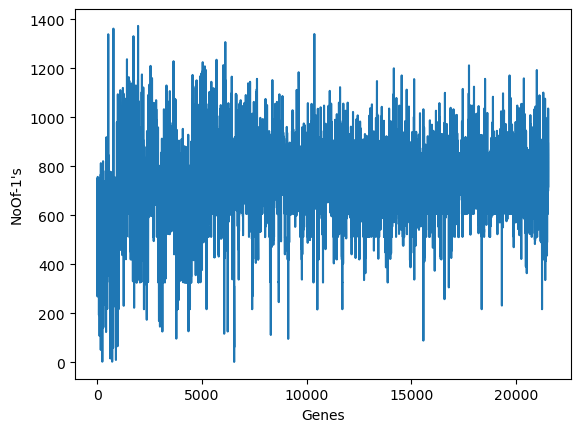

In [10]:
rows = list(range(21552))

plt.xlabel('Genes')
plt.ylabel('NoOf-1\'s')
plt.plot(rows, colSumNull.values())

In [11]:
### No of Voxels having -1 more than threshlod 

In [12]:
(dSagReduc.eq(-1).sum(axis =1) > 10777).sum()

698

In [13]:
### No of genes having -1 more than the threshlod

In [14]:
(dSagReduc.eq(-1).sum() > 586).sum()

18680

Text(0, 0.5, "No of -1's")

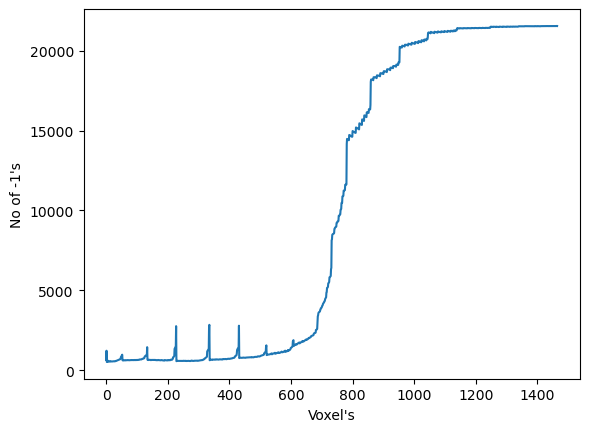

In [15]:
# plot the -1s 
rowSum = dSagReduc.eq(-1).sum(axis =1)
plt.plot(rowSum)
plt.xlabel("Voxel's")
plt.ylabel("No of -1's")

(array([682.,  33.,  17.,  12.,  27.,  10.,  41.,  37.,  94., 512.]),
 array([  524.,  2626.,  4728.,  6830.,  8932., 11034., 13136., 15238.,
        17340., 19442., 21544.]),
 <BarContainer object of 10 artists>)

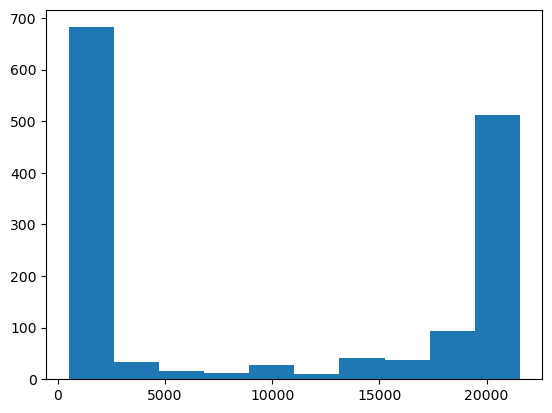

In [16]:
plt.hist(rowSum)

In [17]:
#colSum = dSagReduc.eq(-1).sum()
#plt.plot(colSum)

In [18]:
thresh = [ 1000, 3000, 5000, 10776, 18000, 21000]
StrucID = [ 136, 143, 235, 307, 661, 773, 852, 939, 970, 978, 1048, 1098, 1107]

def calculateThresh(dSagReduc, StrucID, thresh):
    
    for thr in thresh:
    
        print(f"********************** Threshold:{thr} **********************")
        # check the no of rows having more than thresh -1
        indexList = dSagReduc[dSagReduc.eq(-1).sum(axis =1) > thr].index
        print(f"No.of voxels having -1 > {thr} :: {len(indexList)}")
    
        # drop the rows from the dataframe
        d1 = dSagReduc.drop(labels= indexList)
        print(f"The remainig Volxels x Genes ::{d1.shape}")
    
        # no of genes still having -1's
        colNull = d1.columns[d1.eq(-1).any()]
        print(f"No of Genes still having -1's:: {len(colNull)}")
    
        # drop those genes
        d2 = d1.drop(columns = colNull)
        print(f"The remainig Volxels x Genes ::{d2.shape}")
        
        print(f"No of -1's after the thres {d2.eq(-1).any().sum()}") 
    
        # remaing structure IDs at this threshold
        a = d2['Structure-ID'].unique()
        a.sort()
        
        print(f"Structure-ID after Threshold:: {a}")
        print(f"Struc ID left out:: {(set(StrucID) - set(a))}")
        print(d2.groupby('Structure-ID')['Structure-ID'].count())
        
calculateThresh(dSagReduc, StrucID, thresh)

********************** Threshold:1000 **********************
No.of voxels having -1 > 1000 :: 964
The remainig Volxels x Genes ::(501, 21555)
No of Genes still having -1's:: 4404
The remainig Volxels x Genes ::(501, 17151)
No of -1's after the thres 0
Structure-ID after Threshold:: [ 136  143  307  661  852  939  970  978 1048 1098 1107]
Struc ID left out:: {235, 773}
Structure-ID
136     173
143       3
307       3
661      46
852     101
939       3
970       3
978      37
1048     61
1098     29
1107     42
Name: Structure-ID, dtype: int64
********************** Threshold:3000 **********************
No.of voxels having -1 > 3000 :: 778
The remainig Volxels x Genes ::(687, 21555)
No of Genes still having -1's:: 8450
The remainig Volxels x Genes ::(687, 13105)
No of -1's after the thres 0
Structure-ID after Threshold:: [ 136  143  307  661  773  852  939  970  978 1048 1098 1107]
Struc ID left out:: {235}
Structure-ID
136     174
143       3
307      36
661      49
773      11
852    

In [19]:
indexList = dSagReduc[dSagReduc.eq(-1).sum(axis =1) > 3000].index
len(indexList)

778

In [20]:
d1 = dSagReduc.drop(labels= indexList)
d1

,voxRowNum,Structure-ID,Nvl-6,Gtf3c2-8,Ndufv3-13,1810074P20Rik-15,Mageh1-18,Prkag2-30,Dopey2-32,Anln-34,...,Cnfn-100146167,Akap7-100147502,Acin1-100147503,1810074P20Rik-100147504,9930038K12Rik-100147505,4930412L05Rik-100147506,Chrna10-100147507,Nkx2-5-100147508,4933407C03Rik-100147509,Colec10-100147510
0,51174,852,0.004665,0.002163,0.035997,0.000157,0.000302,0.026278,0.025101,0.024441,...,-1.000000,0.005225,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000148
1,51787,136,0.001710,0.001269,0.033640,0.000217,0.000078,0.018631,0.006707,0.021643,...,0.000562,0.001383,0.007604,0.000260,0.000298,0.000129,0.000125,0.008548,0.008344,0.000035
2,53921,852,0.008135,0.003202,0.050814,0.000183,0.000291,0.032620,0.028185,0.025696,...,0.008768,0.000921,0.033425,0.001898,0.000241,0.000224,0.000454,0.015413,0.064888,0.000165
3,53988,852,0.008853,0.003467,0.050990,0.000185,0.000230,0.036768,0.028454,0.024311,...,0.005529,0.000837,0.036933,0.001768,0.000481,0.000170,0.000257,0.015521,0.068414,0.001372
4,54466,136,0.008170,0.003457,0.064461,0.000229,0.000126,0.041628,0.020380,0.035896,...,0.005510,0.000819,0.062369,0.000591,0.001046,0.000141,0.000313,0.034562,0.071443,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,76569,307,0.005630,0.006468,0.064482,0.000011,0.000480,0.029343,0.004854,0.033085,...,0.006570,0.000154,0.053226,-1.000000,0.000449,0.000460,0.000290,0.005048,0.058718,0.000076
683,76570,307,0.005955,0.007876,0.071154,0.000019,0.000477,0.038707,0.005393,0.030601,...,0.008879,0.000272,0.072540,-1.000000,0.000582,0.000447,0.000249,0.006834,0.067670,0.000076
684,76571,307,0.006240,0.010596,0.074844,0.000028,0.000774,0.043229,0.005382,0.028916,...,0.010629,0.000759,0.074201,-1.000000,0.000511,0.000408,0.000250,0.008261,0.078326,0.000190
685,76572,307,0.005814,0.014365,0.069396,0.000045,0.001841,0.046454,0.005072,0.025178,...,0.007474,0.002242,0.072725,-1.000000,0.000759,0.000481,0.000399,0.008250,0.079542,0.000368


In [21]:
d1.eq(-1).sum(axis =1)

0       652
1      1224
2       524
3       533
4       630
       ... 
682    2527
683    2540
684    2566
685    2589
686    2947
Length: 687, dtype: int64

In [22]:
colNull = d1.columns[d1.eq(-1).any()]
len(colNull)

8450

In [23]:
d2 = d1.drop(columns = colNull)
d2

,voxRowNum,Structure-ID,Nvl-6,Ndufv3-13,Mageh1-18,Prkag2-30,Dopey2-32,Hepacam-36,Cnih3-40,Thap1-45,...,Prex2-100144925,Myo1h-100145307,Fgfr2-100145368,Per2-100145388,Hdac2-100145444,Rhpn2-100146042,Mybl1-100146091,Tnfrsf23-100146135,Kif15-100146142,Colec10-100147510
0,51174,852,0.004665,0.035997,0.000302,0.026278,0.025101,0.002156,0.000382,0.009139,...,0.000549,0.000137,0.023408,0.002633,0.045160,0.123479,0.000960,0.001480,0.000117,0.000148
1,51787,136,0.001710,0.033640,0.000078,0.018631,0.006707,0.003783,0.000233,0.011096,...,0.001217,0.000137,0.001316,0.003187,0.006490,0.003364,0.000223,0.004486,0.000067,0.000035
2,53921,852,0.008135,0.050814,0.000291,0.032620,0.028185,0.002144,0.000418,0.007659,...,0.000805,0.000232,0.029200,0.002963,0.053621,0.119984,0.000612,0.002532,0.000338,0.000165
3,53988,852,0.008853,0.050990,0.000230,0.036768,0.028454,0.002195,0.000444,0.006623,...,0.000563,0.000224,0.031096,0.003206,0.059967,0.118447,0.000560,0.002092,0.000293,0.001372
4,54466,136,0.008170,0.064461,0.000126,0.041628,0.020380,0.004771,0.000507,0.022930,...,0.005701,0.000297,0.017179,0.002569,0.042630,0.092569,0.000467,0.007449,0.000394,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,76569,307,0.005630,0.064482,0.000480,0.029343,0.004854,0.002259,0.002629,0.031916,...,0.002796,0.007465,0.025857,0.000282,0.027276,0.116600,0.000152,0.001520,0.000859,0.000076
683,76570,307,0.005955,0.071154,0.000477,0.038707,0.005393,0.002212,0.005349,0.034228,...,0.002556,0.002492,0.028691,0.000429,0.027907,0.133825,0.000043,0.000615,0.001086,0.000076
684,76571,307,0.006240,0.074844,0.000774,0.043229,0.005382,0.002514,0.008574,0.033799,...,0.001502,0.000749,0.026248,0.000856,0.024137,0.150416,0.000019,0.000356,0.001806,0.000190
685,76572,307,0.005814,0.069396,0.001841,0.046454,0.005072,0.003215,0.011022,0.031678,...,0.001126,0.000944,0.019749,0.001794,0.020584,0.148779,0.000013,0.000171,0.003258,0.000368


In [24]:
StrucID = [ 136, 143, 235, 307, 661, 773, 852, 939, 970, 978, 1048, 1098, 1107]
a = d2['Structure-ID'].unique()
a.sort()
print(a)
print(f"Struc ID left out:: {(set(StrucID) - set(a))}")

[ 136  143  307  661  773  852  939  970  978 1048 1098 1107]
Struc ID left out:: {235}


In [25]:
d2.groupby('Structure-ID')['Structure-ID'].count()

Structure-ID
136     174
143       3
307      36
661      49
773      11
852     101
939       3
970      11
978      57
1048    149
1098     29
1107     64
Name: Structure-ID, dtype: int64

In [26]:
dSagReduc.groupby('Structure-ID')['Structure-ID'].count()

Structure-ID
136     351
143       7
235       1
307      90
661      98
773      48
852     196
939       6
970      30
978     115
1048    340
1098     57
1107    126
Name: Structure-ID, dtype: int64

In [27]:
# get the 90% thresh on -1 over voxels
thresh = []
thresh_90 = round(dSagReduc.shape[1] * 0.90)
thresh_60 = round(dSagReduc.shape[1] * 0.60)
thresh.append(thresh_90)
thresh.append(thresh_60)
len(thresh)

2

In [28]:
# calculate the threshold for 90 and 60 %
calculateThresh(dSagReduc, StrucID, thresh)

********************** Threshold:19400 **********************
No.of voxels having -1 > 19400 :: 512
The remainig Volxels x Genes ::(953, 21555)
No of Genes still having -1's:: 20158
The remainig Volxels x Genes ::(953, 1397)
No of -1's after the thres 0
Structure-ID after Threshold:: [ 136  143  307  661  773  852  939  970  978 1048 1098 1107]
Struc ID left out:: {235}
Structure-ID
136     180
143       3
307      81
661      49
773      48
852     101
939       3
970      30
978      57
1048    286
1098     29
1107     86
Name: Structure-ID, dtype: int64
********************** Threshold:12933 **********************
No.of voxels having -1 > 12933 :: 684
The remainig Volxels x Genes ::(781, 21555)
No of Genes still having -1's:: 15042
The remainig Volxels x Genes ::(781, 6513)
No of -1's after the thres 0
Structure-ID after Threshold:: [ 136  143  307  661  773  852  939  970  978 1048 1098 1107]
Struc ID left out:: {235}
Structure-ID
136     174
143       3
307      54
661      49
773

In [29]:
def getThresholdedData(dataSet, thr):
    """
    Function to slash the data based on threshold
    """
    
    df = dataSet.copy()
    
    # check the no of rows having more than thresh -1
    indexList = df[df.eq(-1).sum(axis =1) > thr].index
    
    # drop the rows from the dataframe
    d1 = df.drop(labels= indexList)
    
    # no of genes still having -1's
    colNull = d1.columns[d1.eq(-1).any()]
    
    # drop those genes
    d2 = d1.drop(columns = colNull)
    
    return d2

In [30]:
# get the threhold data at 5000
dSagThres = getThresholdedData(dSagReduc, 5000)
dSagThres                          

,voxRowNum,Structure-ID,Nvl-6,Ndufv3-13,Mageh1-18,Prkag2-30,Dopey2-32,Hepacam-36,Thap1-45,9130024F11Rik-52,...,Prex2-100144925,Myo1h-100145307,Fgfr2-100145368,Per2-100145388,Hdac2-100145444,Rhpn2-100146042,Mybl1-100146091,Tnfrsf23-100146135,Kif15-100146142,Colec10-100147510
0,51174,852,0.004665,0.035997,0.000302,0.026278,0.025101,0.002156,0.009139,0.038880,...,0.000549,0.000137,0.023408,0.002633,0.045160,0.123479,0.000960,0.001480,0.000117,0.000148
1,51787,136,0.001710,0.033640,0.000078,0.018631,0.006707,0.003783,0.011096,0.042372,...,0.001217,0.000137,0.001316,0.003187,0.006490,0.003364,0.000223,0.004486,0.000067,0.000035
2,53921,852,0.008135,0.050814,0.000291,0.032620,0.028185,0.002144,0.007659,0.042105,...,0.000805,0.000232,0.029200,0.002963,0.053621,0.119984,0.000612,0.002532,0.000338,0.000165
3,53988,852,0.008853,0.050990,0.000230,0.036768,0.028454,0.002195,0.006623,0.047393,...,0.000563,0.000224,0.031096,0.003206,0.059967,0.118447,0.000560,0.002092,0.000293,0.001372
4,54466,136,0.008170,0.064461,0.000126,0.041628,0.020380,0.004771,0.022930,0.063564,...,0.005701,0.000297,0.017179,0.002569,0.042630,0.092569,0.000467,0.007449,0.000394,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,78990,773,0.008013,0.055264,0.000173,0.043197,0.032519,0.001480,0.009142,0.046274,...,0.001231,0.000168,0.038785,0.002285,0.057115,0.147361,0.000574,0.000665,0.000065,0.001649
713,79047,1048,0.010273,0.060376,0.000202,0.040941,0.040615,0.001708,0.011147,0.047592,...,0.000307,0.000703,0.037783,0.001200,0.059613,0.093807,0.000324,0.000354,0.000197,0.000695
714,79048,1048,0.009678,0.060784,0.000429,0.040020,0.042993,0.001513,0.010546,0.046546,...,0.000400,0.000657,0.036050,0.000963,0.054418,0.089769,0.000318,0.000430,0.000192,0.000518
715,79114,1048,0.009569,0.071846,0.000182,0.042147,0.032148,0.001800,0.019031,0.054519,...,0.000303,0.000699,0.038940,0.001070,0.068824,0.096646,0.000198,0.000502,0.000435,0.000497


In [31]:
dSagThres.to_csv('dSag_5000_Thresh.csv', index=False)

### Normalize the data before PCA

In [32]:
# get a copy of the scaler object
sc = StandardScaler()

dSagNorm = dSagThres.drop(columns=['voxRowNum','Structure-ID'])

# Z- score Normalization
dSagNorm = sc.fit_transform(dSagNorm) 

# convert the normalized data to data frame
dSagNorm = pd.DataFrame(dSagNorm, columns= sc.get_feature_names_out())
dSagNorm

,Nvl-6,Ndufv3-13,Mageh1-18,Prkag2-30,Dopey2-32,Hepacam-36,Thap1-45,9130024F11Rik-52,Mansc1-54,Pmch-56,...,Prex2-100144925,Myo1h-100145307,Fgfr2-100145368,Per2-100145388,Hdac2-100145444,Rhpn2-100146042,Mybl1-100146091,Tnfrsf23-100146135,Kif15-100146142,Colec10-100147510
0,-1.563057,-1.865416,-0.081217,-1.278131,-0.826898,0.027852,-0.386941,-0.454661,0.191117,-0.597402,...,-0.397200,-0.373215,-0.465495,-0.100394,-0.152090,0.756692,1.320779,1.523851,-0.648705,-0.559083
1,-2.821404,-2.045634,-0.546312,-1.963319,-2.102089,1.254534,-0.202505,-0.214851,-2.250570,-0.281162,...,-0.097515,-0.372657,-2.523879,0.064351,-2.399890,-3.619006,-0.563516,7.207645,-0.688506,-0.792730
2,-0.085684,-0.732743,-0.104535,-0.709880,-0.613139,0.018663,-0.526424,-0.233176,0.165572,-0.618019,...,-0.282014,-0.189714,0.074128,-0.002290,0.339744,0.629378,0.432835,3.512727,-0.474867,-0.524787
3,0.219953,-0.719253,-0.231331,-0.338206,-0.594466,0.057579,-0.624037,0.130069,0.098754,-0.636736,...,-0.390780,-0.205886,0.250730,0.069938,0.708607,0.573376,0.297639,2.680982,-0.510298,1.957276
4,-0.070875,0.310617,-0.447919,0.097162,-1.154228,1.999131,0.912669,1.240779,-0.569459,-0.329715,...,1.914973,-0.064886,-1.045858,-0.119527,-0.299167,-0.369331,0.061460,12.809150,-0.430250,-0.730524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,-0.137576,-0.392494,-0.350303,0.237747,-0.312686,-0.481569,-0.386727,0.053210,0.525676,-0.423094,...,-0.091116,-0.312372,0.967186,-0.204079,0.542839,1.626713,0.334153,-0.016793,-0.689864,2.527708
713,0.824466,-0.001701,-0.289093,0.035667,0.248634,-0.309410,-0.197699,0.143728,-0.383292,0.421416,...,-0.505664,0.718717,0.873811,-0.527099,0.688003,-0.324220,-0.304158,-0.603620,-0.586129,0.564708
714,0.571255,0.029499,0.182457,-0.046874,0.413484,-0.456805,-0.254328,0.071869,-0.649462,-0.121795,...,-0.463893,0.629839,0.712365,-0.597595,0.386055,-0.471318,-0.319782,-0.460534,-0.589520,0.201766
715,0.524841,0.875180,-0.330328,0.143701,-0.338356,-0.240589,0.545264,0.619523,-0.013161,0.351028,...,-0.507467,0.709962,0.981556,-0.565854,1.223457,-0.220817,-0.625627,-0.323814,-0.398423,0.157453


In [33]:
RANDOM_STATE = 3010
# get a model for components explaining 95% of variance 
model = PCA(n_components = 0.95, random_state=RANDOM_STATE)

# fit transform the data
pca_PC = model.fit_transform(dSagNorm)

# variance explained by components
variance = model.explained_variance_ratio_
cum_var = np.cumsum(variance)

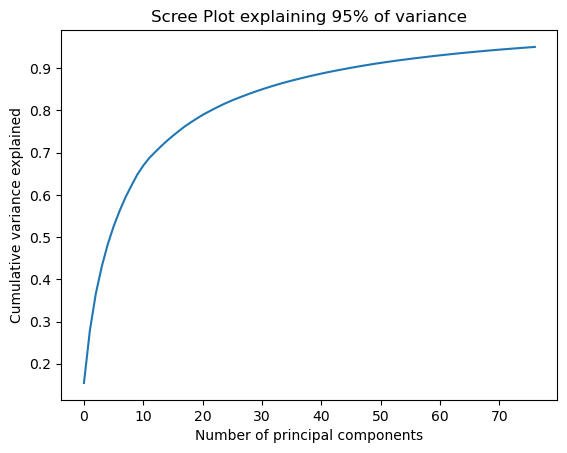

In [34]:
# Generate a scree plot
plt.title("Scree Plot explaining 95% of variance")
plt.plot(cum_var)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [35]:
cum_var[:10]

array([0.15455816, 0.27877269, 0.3660108 , 0.42992349, 0.4823213 ,
       0.52524459, 0.56165745, 0.59411648, 0.62174881, 0.64820459])

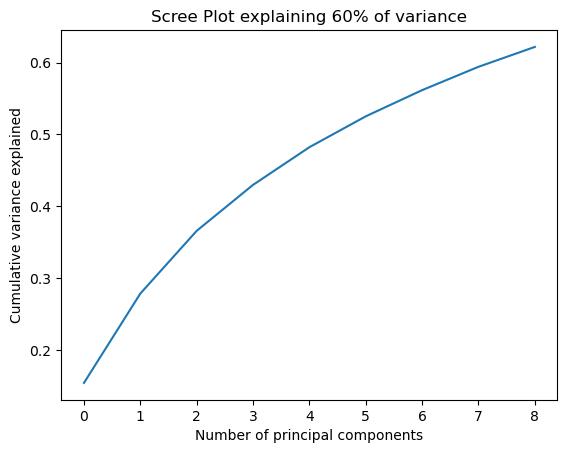

In [36]:
# plot 19 components
plt.title("Scree Plot explaining 60% of variance")
plt.plot(cum_var[:9])
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

### Create a dataframe having components and features

In [37]:
col = []
for i in range(1,9,1):
    col.append('PC'+str(i))
    
loadings = pd.DataFrame(model.components_[:8].T, columns=col, index=dSagNorm.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Nvl-6,-0.010873,-0.003602,0.008834,-0.004415,-0.016037,0.008174,0.004527,0.008321
Ndufv3-13,-0.013781,0.007043,0.004229,0.015260,-0.003504,0.004543,-0.005908,0.011295
Mageh1-18,0.004155,-0.003993,0.014948,0.009856,0.004122,-0.001158,0.001559,0.018528
Prkag2-30,-0.018942,0.000938,-0.004543,0.008853,0.002008,-0.001493,-0.005177,0.013547
Dopey2-32,-0.016716,0.003110,-0.015001,-0.009336,-0.007007,-0.000229,0.000643,0.009811
...,...,...,...,...,...,...,...,...
Rhpn2-100146042,-0.018573,0.004729,-0.000568,0.002752,0.008840,0.011512,-0.009576,0.003331
Mybl1-100146091,-0.000181,-0.009262,0.001882,-0.001754,-0.001378,0.006515,0.011348,-0.008360
Tnfrsf23-100146135,-0.000036,-0.001130,0.004332,-0.004809,0.010377,-0.006758,-0.000962,0.000863
Kif15-100146142,-0.003708,-0.002413,-0.006808,0.005971,-0.008524,0.010713,-0.008311,-0.017063


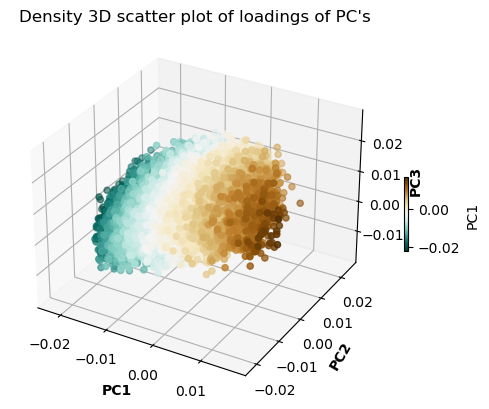

In [38]:
from matplotlib.colors import ListedColormap
# 3D plot of PC's

x = loadings['PC1']
y = loadings['PC2']
z = loadings['PC3']
fig = plt.figure()
plt.rcParams["figure.figsize"] = [7, 9]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

plotDS = ax.scatter3D(x, y, z, c=x, cmap='BrBG_r') # c = x, cmap = cmap, alpha=1
#plotDS = ax.scatter3D(x, y, z) #c = x, cmap = cmap, alpha=1)

plt.title("Density 3D scatter plot of loadings of PC's")

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold', rotation = 60)
ax.set_zlabel('PC3', fontweight ='bold', rotation = 90)
colbar = fig.colorbar(plotDS, ax = ax, shrink = 0.2, aspect = 20 )
colbar.set_label('PC1')

# show plot
plt.show()
#plt.rcParams.update(plt.rcParamsDefault)

In [106]:
# dataframe to hold no of genes remaining at different cutoff for each PC's
cutOffData = pd.DataFrame(columns=['0.01', '0.02', '0.03'], 
                          index= loadings.columns)
cutoff = [0.01, 0.02, 0.03, 0.04]


for col in loadings.columns:
    #val = abs((loadings)).sort_values(by = col, ascending = False)[col]
    val = abs((loadings))[col]
    gCount = []
    for cut in cutoff[:-1]:
        gCount.append(sum(val > cut))
    
    # Add the new row to the DataFrame
    cutOffData.loc[col] = gCount

print(cutOffData)

     0.01 0.02 0.03
PC1  3374  271    0
PC2  3578  194    0
PC3  3548  240    0
PC4  3595  217    0
PC5  3451  312    4
PC6  3150  444   12
PC7  3121  457   16
PC8  3282  356   16


In [104]:
cutoff[:-1]

[0.01, 0.02, 0.03]

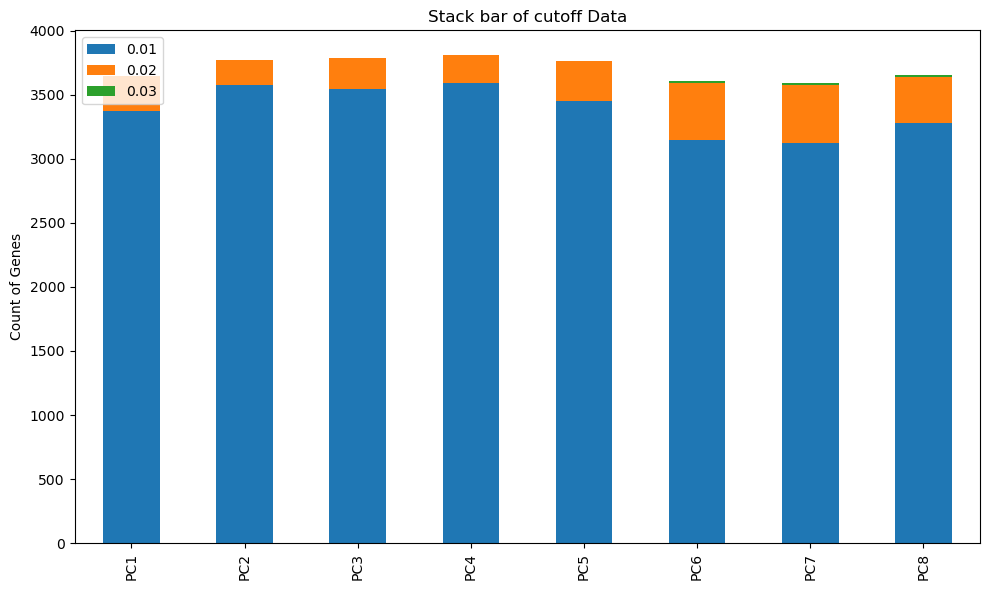

In [47]:
cutOffData.plot(kind = 'bar' , stacked = True, figsize = (10,6))
plt.title('Stack bar of cutoff Data')
plt.ylabel('Count of Genes')
plt.show()

In [62]:
# get the gene names for each PC's at x cutoff
def geneAtCutOff(x):
    unqGn = {}
    cut = x
    for col in loadings.columns:
        unqGn[col] = loadings[abs((loadings))[col] > x][col].index.tolist()
    return unqGn

gn = geneAtCutOff(0.02)

gn['PC1'][0:5] # just look at 5 genes for PC1 to check the outcome

['Tmem50b-134', 'Bcan-155', 'Bsg-167', 'Calm2-183', 'Lynx1-656']

### Important Features for PC's based on loadigns

In [65]:
# create a dataframe to have the important features
impFetPC_df = pd.DataFrame(columns=['PC', 'ImpFeature', 'Loading',])

# loop through the columns to create a dataframe of important features
for col in loadings.columns:
    # get the feature name having max impact
    fet = abs(loadings[col]).idxmax()
    # get the loadings value
    load = loadings.loc[fet, col]
    
    # create the datafame
    df = pd.DataFrame({'PC': [col],
                        'ImpFeature': [fet],
                        'Loading': [load]})
    
    # concat the data to the dataframe
    impFetPC_df = pd.concat([impFetPC_df, df], ignore_index=True)
                            
print(impFetPC_df)

    PC        ImpFeature   Loading
0  PC1  Ndufa10-67881785 -0.022213
1  PC2  Galnt14-69672760  0.024200
2  PC3   Arrdc1-68341710  0.026709
3  PC4    Kcnn3-69258071  0.027128
4  PC5       Pigy-227746 -0.031883
5  PC6   Tspan6-70539159  0.035492
6  PC7   Lrrc58-70231941  0.034213
7  PC8        Ubxn11-323  0.033487


In [88]:
gene01 = loadings.loc[(abs(loadings['PC1'])) > 0.01].index
gene02 = loadings.loc[(abs(loadings['PC1'])) > 0.02].index
gene03 = loadings.loc[(abs(loadings['PC1'])) > 0.03].index

for col in loadings.columns[1:]:
    
    gen1 = loadings.loc[(abs(loadings[col])) > 0.01].index
    gen2 = loadings.loc[(abs(loadings[col])) > 0.02].index
    gen3 = loadings.loc[(abs(loadings[col])) > 0.03].index
    
    # print("{} Before union:::{}".format(col,len(gene05)))
    # print("Length of gene for {} is {}".format(col, len(gen5)))
    gene01 = gene01.union(gen1)
    gene02 = gene02.union(gen2)
    gene03 = gene03.union(gen3)

print('Distinct No of Genes at cutoff 0.01 for all PC\'s::{}'.format(len(gene01)))
print('Distinct No of Genes at cutoff 0.02 for all PC\'s::{}'.format(len(gene02)))
print('Distinct No of Genes at cutoff 0.03 for all PC\'s::{}'.format(len(gene03)))

Distinct No of Genes at cutoff 0.01 for all PC's::10902
Distinct No of Genes at cutoff 0.02 for all PC's::2429
Distinct No of Genes at cutoff 0.03 for all PC's::48


### Get unique no of genes present in one PC but not present in any other PC's

In [63]:
# Function to get uqnique gene at a cutoff for PC's
def unqGeneAtCutOff(x):
    
    total = 0;
    for c in loadings.loc[:,:]:
    
        gene = loadings.loc[(abs(loadings[c])) > x].index
        #print("length of gene at {} is {}".format(c, len(gene)))

        for col in loadings.loc[:,:]:
            if col == c:
                continue
            cGene = loadings.loc[(abs(loadings[col])) > x].index
            gene = gene.difference(cGene)
            
        print('{} \t {}'.format(c,len(gene)))
        total = total + len(gene)
    
    print("Total unique Gene::: {}".format(total))

In [84]:
unqGeneAtCutOff(0.01)

PC1 	 465
PC2 	 222
PC3 	 234
PC4 	 209
PC5 	 198
PC6 	 128
PC7 	 219
PC8 	 256
Total unique Gene::: 1931


In [93]:
unqGeneAtCutOff(0.02)

PC1 	 271
PC2 	 191
PC3 	 226
PC4 	 204
PC5 	 294
PC6 	 412
PC7 	 431
PC8 	 338
Total unique Gene::: 2367


In [94]:
unqGeneAtCutOff(0.03)

PC1 	 0
PC2 	 0
PC3 	 0
PC4 	 0
PC5 	 4
PC6 	 12
PC7 	 16
PC8 	 16
Total unique Gene::: 48


### Data frame for the actual Density data at cutoff

In [96]:
# Function to get a dataFrame at a cutoff 
# input is names of Gene object ex: gene02, gene03 from above computation
def dataFrameAtCutOff(gn):
    cutOffGene = dSagThres.copy()
    cutOffGene = cutOffGene[gn]
    cutOffGene['Structure-ID'] = denSag['Structure-ID']
    return cutOffGene

cutOffGene02 = dataFrameAtCutOff(gene02) # create a dataframe using genenames at given cutoff
cutOffGene02

,0610007C21Rik-69113518,0610008A24Rik*-81600594,0610009I12Rik*-74357773,0610011L14Rik-601189,0610030E20Rik-69352782,1110002B05Rik-74003413,1110002N22Rik-69352846,1110004E09Rik-68342003,1110007C09Rik-69013173,1110059E24Rik-71492778,...,Znhit2-70474083,Znhit6-70566041,Zscan12-71763673,Zscan4c-77924436,Zswim7-69202627,Zw10-69549655,mCG1030693.1-71022852,mCG142183-71211823,mCG147059-73635407,Structure-ID
0,0.011031,0.140896,0.109090,0.000786,0.001246,0.001167,0.017450,0.041177,0.005277,0.002579,...,0.000199,0.014949,1.431302e-04,0.000523,0.003458,0.001683,0.016700,5.342784e-04,0.000519,852
1,0.007736,0.030990,0.080677,0.001082,0.000148,0.000080,0.009504,0.039380,0.000418,0.000130,...,0.000002,0.001399,1.975497e-07,0.000191,0.000051,0.000372,0.004365,1.450195e-04,0.001147,136
2,0.014677,0.144789,0.137318,0.001145,0.000695,0.001014,0.026007,0.046587,0.005103,0.002015,...,0.000262,0.015058,6.659805e-05,0.000769,0.003027,0.002021,0.017679,2.801886e-04,0.002393,852
3,0.011319,0.138869,0.134069,0.001918,0.000949,0.001000,0.025524,0.051024,0.004481,0.002349,...,0.000315,0.013877,1.800315e-05,0.000442,0.003106,0.001990,0.015328,3.880111e-04,0.002881,852
4,0.020919,0.104348,0.146627,0.004576,0.001082,0.000417,0.024738,0.098267,0.003591,0.000406,...,0.000033,0.008296,4.434559e-05,0.000458,0.000552,0.001884,0.012645,1.205327e-04,0.004320,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.032847,0.106240,0.145873,0.000684,0.000171,0.002259,0.019926,0.085445,0.007395,0.001019,...,0.000281,0.007402,9.257633e-04,0.000393,0.003288,0.015058,0.007359,5.741623e-07,0.000045,773
713,0.031092,0.126600,0.103437,0.003365,0.000272,0.003462,0.025326,0.075018,0.002227,0.006905,...,0.000123,0.009425,4.305511e-05,0.000492,0.006630,0.013806,0.013698,3.177237e-06,0.000994,1048
714,0.031032,0.123399,0.105017,0.003714,0.000295,0.003431,0.026164,0.077254,0.001805,0.007633,...,0.000116,0.010180,8.294760e-05,0.000640,0.006634,0.013223,0.014099,1.639378e-06,0.000891,1048
715,0.036990,0.131706,0.105203,0.004261,0.000236,0.005012,0.029886,0.085698,0.001567,0.005022,...,0.000150,0.010875,3.661978e-05,0.000766,0.007561,0.014233,0.015712,2.202704e-05,0.002107,1048


In [97]:
cutOffGene02.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     174
143       3
307      36
661      49
773      23
852     101
939       3
970      15
978      57
1048    163
1098     29
1107     64
Name: count, dtype: int64

In [107]:
dSagThres.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     174
143       3
307      36
661      49
773      23
852     101
939       3
970      15
978      57
1048    163
1098     29
1107     64
Name: count, dtype: int64

In [108]:
dSagReduc.groupby('Structure-ID')['Structure-ID'].value_counts()

Structure-ID
136     351
143       7
235       1
307      90
661      98
773      48
852     196
939       6
970      30
978     115
1048    340
1098     57
1107    126
Name: count, dtype: int64